# Explore here

In [5]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt



In [7]:
load_dotenv()

# Obtener las credenciales de las variables de entorno
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
redirect_uri = os.getenv("REDIRECT_URI")

# Imprimir para verificar si se cargaron correctamente
print(client_id, client_secret, redirect_uri)

0b980593fa374a16b92313da223e0cbd ed91641252874e0fb9076480bac05865 https://symmetrical-doodle-9gpjg6r464xf996g-43999.githubpreview.dev/


In [12]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

artist_id = "1IAwO3v7hVP9ryTQtlzc9y"

# Función para obtener el top 10 de canciones del artista
def get_top_tracks(artist_id):
    results = spotify.artist_top_tracks(artist_id)
    tracks = results["tracks"][:10]  # Top 10 canciones
    return [
        {
            "nombre": track["name"],
            "popularidad": track["popularity"],
            "duracion_minutos": round(track["duration_ms"] / 60000, 2)
        }
        for track in tracks
    ]
top_tracks = get_top_tracks(artist_id)
top_tracks


[{'nombre': 'Me Sabe Mal', 'popularidad': 59, 'duracion_minutos': 3.27},
 {'nombre': 'te vas a inventar', 'popularidad': 54, 'duracion_minutos': 2.87},
 {'nombre': 'Gitana', 'popularidad': 55, 'duracion_minutos': 3.59},
 {'nombre': 'estaré millor demà', 'popularidad': 52, 'duracion_minutos': 3.07},
 {'nombre': 'bailamorena', 'popularidad': 53, 'duracion_minutos': 2.81},
 {'nombre': 'Último Baile', 'popularidad': 50, 'duracion_minutos': 3.0},
 {'nombre': 'amor de verano', 'popularidad': 47, 'duracion_minutos': 2.94},
 {'nombre': 'échame la culpa <3', 'popularidad': 50, 'duracion_minutos': 2.99},
 {'nombre': 'no te deseo lo peor :)',
  'popularidad': 48,
  'duracion_minutos': 3.16},
 {'nombre': 'NADA QUE DECIR', 'popularidad': 48, 'duracion_minutos': 3.56}]

In [13]:
df = pd.DataFrame(top_tracks)

# Ordenar por popularidad creciente
df_sorted = df.sort_values(by="popularidad", ascending=True)

# Mostrar el top 3 más popular
top_3 = df_sorted.head(3)
top_3

,nombre,popularidad,duracion_minutos
6,amor de verano,47,2.94
8,no te deseo lo peor :),48,3.16
9,NADA QUE DECIR,48,3.56


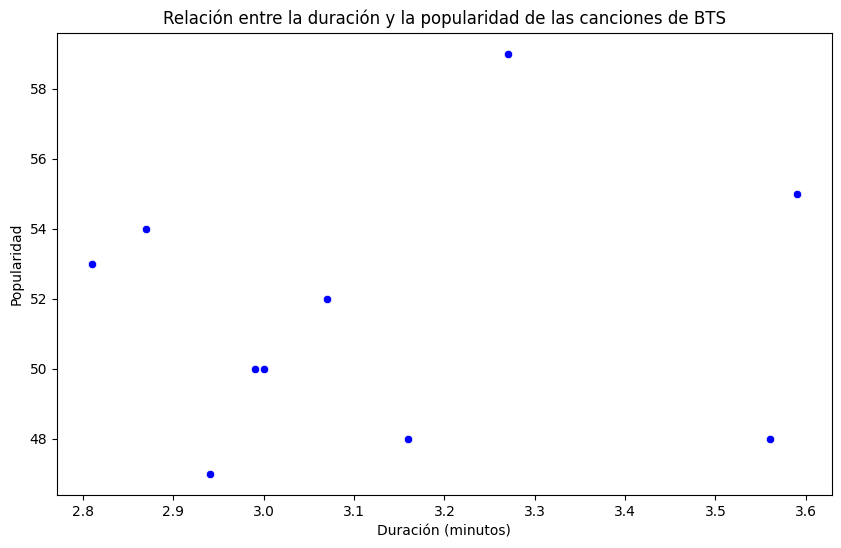

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="duracion_minutos", y="popularidad", marker='o', color='b')

# Título y etiquetas
plt.title('Relación entre la duración y la popularidad de las canciones de BTS')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')

# Mostrar el gráfico
plt.show()